In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV #this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("default of credit card clients.txt",sep='\t',header=1)

In [3]:
df.drop('ID',axis=1,inplace=True)
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)


In [4]:
print(df['SEX'].unique())
print(df['EDUCATION'].unique())
print(df['MARRIAGE'].unique())

[2 1]
[2 1 3 5 4 6 0]
[1 2 3 0]


In [5]:
len(df.loc[(df['MARRIAGE']==0) | (df['EDUCATION']==0)])

68

In [6]:
df_no_missing = df.loc[(df['MARRIAGE']!=0) & (df['EDUCATION']!=0)]
len(df_no_missing)
df_no_missing.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df_no_default = df_no_missing[df_no_missing['DEFAULT']==0]
df_default = df_no_missing[df_no_missing['DEFAULT']==1]

In [8]:
df_no_default_downsampled = resample(df_no_default,replace=False,n_samples=1000,random_state=42)
df_default_downsampled = resample(df_default,replace=False,n_samples=1000,random_state=42)

In [9]:
df_downsampled = pd.concat([df_no_default_downsampled,df_default_downsampled])
len(df_downsampled)

2000

In [10]:
X = df_downsampled.drop('DEFAULT',axis=1).copy()
y = df_downsampled['DEFAULT'].copy()

In [11]:
X_encoded = pd.get_dummies(X,columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']).astype(int)
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42)
#splitting train test data for both X and y

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
#scaling means to standardize all columns to mean of zero and standard deviation of 1

In [25]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled,y_train)


SVC(random_state=42)

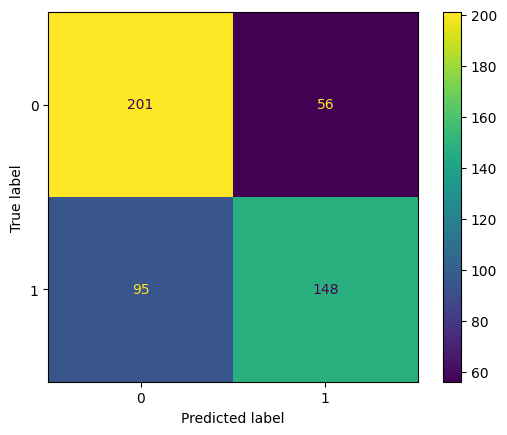

Precision: 0.7255
Accuracy: 0.6980
Sensitivity (Recall): 0.6091


In [26]:
def plot_confusion_mat(ml_model,x_test1,y_test1):
    predictions = ml_model.predict(x_test1)
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    # Calculate precision, accuracy, and sensitivity
    precision = precision_score(y_test1, predictions)
    accuracy = accuracy_score(y_test1, predictions)
    sensitivity = recall_score(y_test1, predictions)

    print(f'Precision: {precision:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Sensitivity (Recall): {sensitivity:.4f}')
plot_confusion_mat(clf_svm,X_test_scaled,y_test)

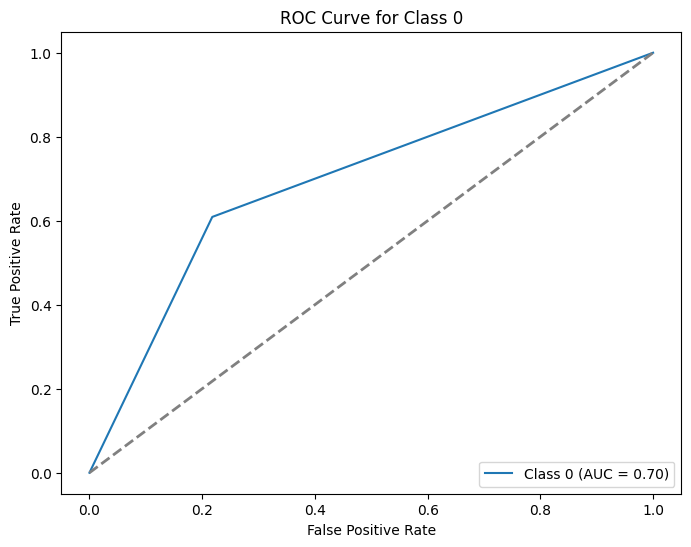

In [27]:
class_index = 0  # Replace with the index of the class you are interested in
y_score = clf_svm.predict(X_test_scaled)
# Compute ROC curve and ROC area for the selected class
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))

# Plot the ROC curve for the selected class
plt.plot(fpr, tpr, label=f'Class {0} (AUC = {roc_auc:.2f})')

# Plot a diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Class {class_index}')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [28]:
param_grid = [
{'C': [0.5, 1, 10, 100], # NOTE: Values for C must be > 0
'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']},

## NOTE: We are includeing C=l and gamma='scale'
## as possible choices since they are the default values.
]
optimal_params = GridSearchCV(
SVC(),
param_grid,
cv=5,
scoring='accuracy', ## (accruacy is default scoring) Slightly improved, but hardly !!! C=1, g
##scoring='balanced_accuracy', ## Slightly improved, but hardly !!! C=1, gamma=0.01
##scoring='f1', ## Terrible !!! C=0.5, gamma=1
##scoring='f1_micro', ## Slightly improved, but hardly !!! C=1, gamma=0.01
##scoring='f1_macro', ## Same !! C=1, gamma='scale' (these are the same as default values)
##scoring='fl_weighted', ## Same !! C=1, gamma='scale' (these are the same as default values)
##scoring='roc_auc', ## Terrible !!! C=1, gamma=0.001
## For more scoring metics see:
## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
verbose=0) # NOTE: If you want to see what Grid Search is doing, set verbose=2

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [29]:
clf_svm = SVC(random_state = 42,C=100,gamma=0.001)
clf_svm.fit(X_train_scaled,y_train)


SVC(C=100, gamma=0.001, random_state=42)

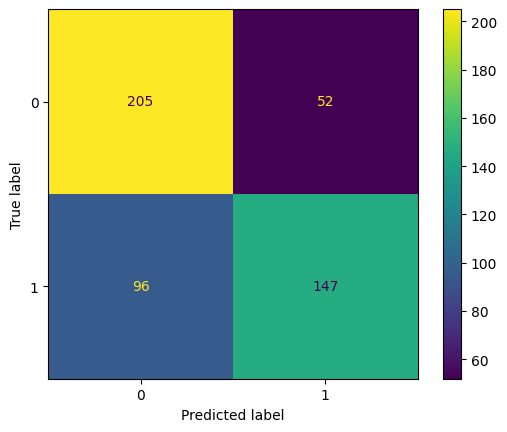

Precision: 0.7387
Accuracy: 0.7040
Sensitivity (Recall): 0.6049


In [30]:
plot_confusion_mat(clf_svm,X_test_scaled,y_test)

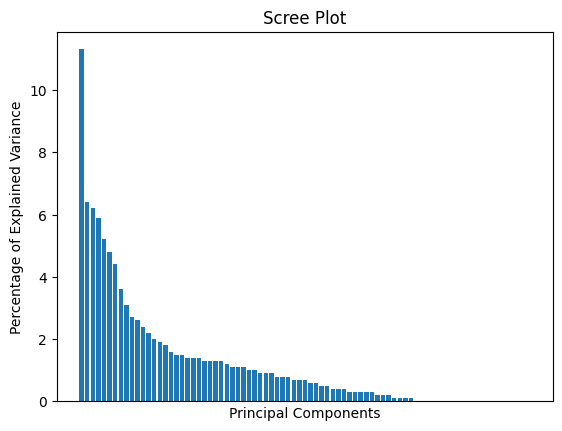

In [31]:
pca= PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
axis='x',# changes apply to the x-axis
which='both',# both major and minor ticks are affected
bottom=False,# ticks along the bottom edge are off
top=False,# ticks along the top edge are off
labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [32]:
#i copy these 2 first columns of pca because they have the ost impact on the data prediction

pca_train_scaled = scaler.fit_transform(np.vstack((X_train_pca[:, 0], X_train_pca[:, 1])).T)

param_grid = [
{'C': [1, 10, 100,1000],
'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']},
]
optimal_params = GridSearchCV(
SVC(),
param_grid,
cv=5,
scoring='accuracy',
verbose=0)

optimal_params.fit(pca_train_scaled, y_train)

print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [33]:
clf_svm = SVC(random_state = 42,C=1000,gamma=0.001)
clf_svm.fit(pca_train_scaled,y_train)

SVC(C=1000, gamma=0.001, random_state=42)

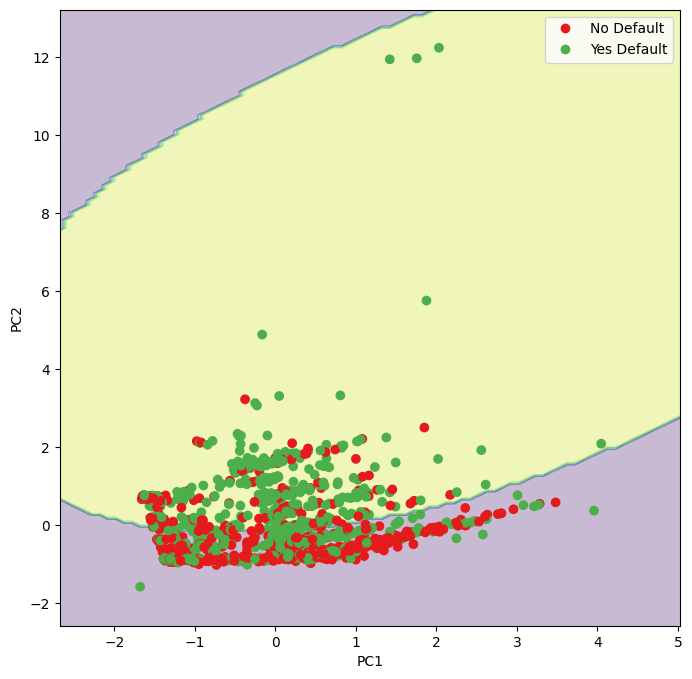

In [34]:
x_min = pca_train_scaled[:, 0].min() - 1
x_max = pca_train_scaled[:, 0].max() + 1

y_min = pca_train_scaled[:, 1].min() - 1
y_max =pca_train_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
np.arange(start=y_min, stop=y_max, step=0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel( ))))

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(8,8))

ax.contourf(xx, yy, Z, alpha=0.3)

## now create custom colors for the actual data points
cmap = colors.ListedColormap( ['#e41a1c', '#4daf4a'])

scatter = ax.scatter(pca_train_scaled[:, 0], pca_train_scaled[:, 1], c=y_train,cmap=cmap)

## now create a legend
legend = ax. legend(scatter. legend_elements() [0],
scatter. legend_elements() [1],
loc="upper right")
legend.get_texts() [0].set_text("No Default")
legend.get_texts() [1].set_text("Yes Default")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')

plt.show()